#**1) Using PCA:**

---

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people

lfw_people = fetch_lfw_people(min_faces_per_person=20, resize=0.4)

n_samples, h, w = lfw_people.images.shape

X = lfw_people.data
n_features = X.shape[1]

y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Total dataset size:
n_samples: 3023
n_features: 1850
n_classes: 62


In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
import numpy as np
def topPrincipalComponents(eigen_values,eigen_faces,num_of_components):
    ef = eigen_faces[:,:num_of_components]
    return ef

def PCA(X):
  mean_data=np.mean(X,axis=0)
  std_data=np.std(X,axis=0)
  norm_data=(X-mean_data)/std_data

  covar=np.cov(norm_data.T)
  eigenvalues,eigenvectors=np.linalg.eig(covar)
  sorted_indices=(-eigenvalues).argsort()
  eigenvalues = eigenvalues[sorted_indices]
  eigenvectors = eigenvectors[:, sorted_indices]

  return eigenvalues,eigenvectors

In [4]:
eigen_values,eigen_vectors=PCA(X_train)

In [5]:
def find_optimal_num_components(eigen_values, thr=0.998):
    cumulative_variance_ratio = np.cumsum(eigen_values ** 2) / np.sum(eigen_values ** 2)
    k = np.argmax(cumulative_variance_ratio >= thr) + 1
    return k

n_component = find_optimal_num_components(eigen_values)
print("Optimal number of components:",n_component)

Optimal number of components: 37


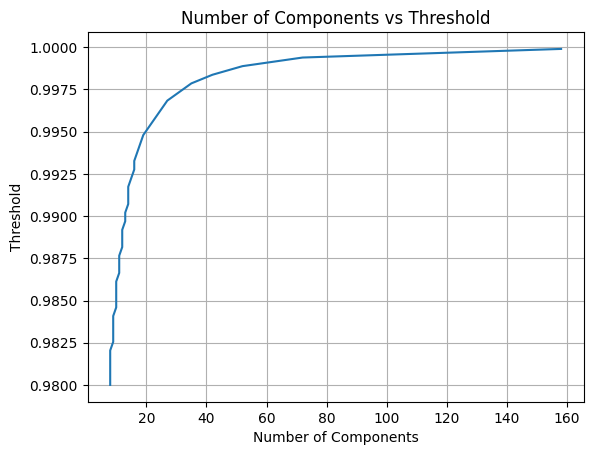

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def plot_threshold_vs_components(eigen_values):
    thresholds = np.linspace(0.98, 0.9999, 40)
    num_components = []

    for threshold in thresholds:
        k = find_optimal_num_components(eigen_values, threshold)
        num_components.append(k)


    plt.plot(num_components, thresholds)
    plt.xlabel('Number of Components')
    plt.ylabel('Threshold')
    plt.title('Number of Components vs Threshold')
    plt.grid(True)
    plt.show()

plot_threshold_vs_components(eigen_values)


In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

n_components=37

eigen_faces=eigen_vectors[:,:n_components]
X_train_pca=np.dot(X_train,eigen_faces)# projection on pca axis

model=RandomForestClassifier()
model.fit(X_train_pca,y_train)

RandomForestClassifier()

In [9]:
X_test_pca=np.dot(X_test,eigen_faces)
y_predicted=model.predict(X_test_pca)

In [10]:
accuracy = accuracy_score(y_test, y_predicted)
print("Accuracy:", accuracy)

Accuracy: 0.3421487603305785


In [11]:
def imageReconstruction(row,all_means,ef,Y_train,img_num,cmp,j,tmp):
    row = row - all_means
    xk = np.matmul(row,ef)
    row = np.matmul(xk,ef.T)
    row = row + all_means
    row = np.reshape(row,[50,37])
    plt.subplot(6,6,tmp+1)

    plt.imshow(row)
    plt.subplots_adjust(right=1.2, top=1.2)
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
    if(j == 5):
        print('Face Number: '+str(img_num))
        plt.show()

    img = Y_train[img_num]

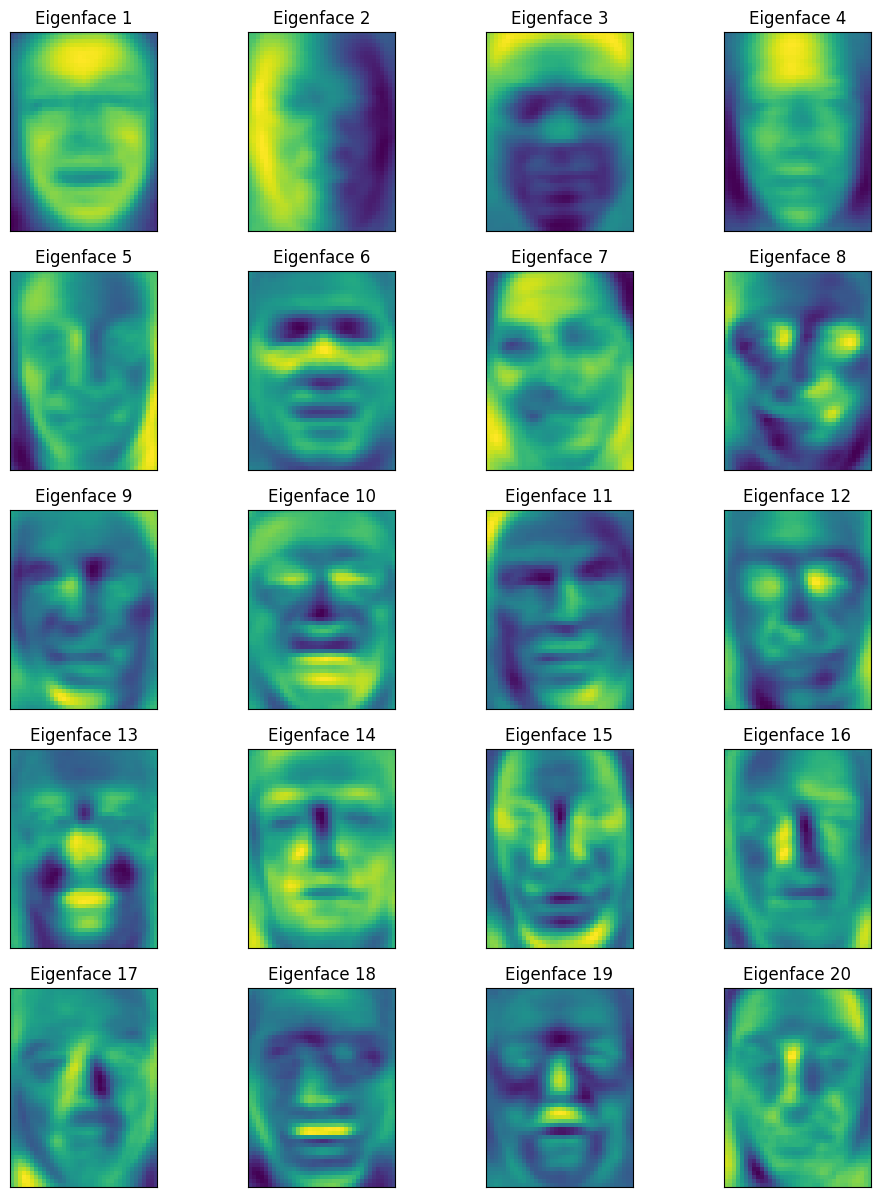

In [12]:
import matplotlib.pyplot as plt
ef = topPrincipalComponents(eigen_values,eigen_faces,37)
def plot_eigenfaces(ef):
    num_eigenfaces = ef.shape[1]
    num_rows = 5
    num_cols = 4

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 15))

    for i in range(num_rows):
        for j in range(num_cols):
            idx = i * num_cols + j
            if idx < num_eigenfaces:
                tf = ef[:, idx]
                ax = axes[i, j]
                ax.imshow(tf.reshape((50, 37)))
                ax.set_xticks([])
                ax.set_yticks([])
                ax.set_title(f'Eigenface {idx+1}')
            else:
                axes[i, j].axis('off')

    plt.subplots_adjust(wspace=0.1, hspace=0.2)
    plt.show()

plot_eigenfaces(ef)